<a href="https://colab.research.google.com/github/beyzaturku/Weather_Detection_Using_CNN/blob/main/Weather_Detection_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epochlarda 96-95 iken test sonucunun 76 olma sebebi nedir?


In [1]:
!python --version

Python 3.11.11


In [2]:
!pip install opencv-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/Weather_Detection/wd_dataset.zip'

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

Google Colab'a dosya yükleme işlemi

In [15]:
from google.colab import files
uploaded = files.upload()

Saving wd_dataset.zip to wd_dataset.zip


In [39]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adamax

Veri Setini Yükleme

In [56]:
image_folder = "Multi-class Weather Dataset"

In [57]:
subfolders = [ 'Cloudy', 'Rain', 'Shine', 'Sunrise']
label_map = { subfolder: idx for idx, subfolder in enumerate(subfolders)}

# List of Images and Labels
images = []
labels = []

# Loading Dataset

for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (224,224))
            images.append(img_resized)
            labels.append(label_map[subfolder])

# Coverted to Numpy Arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the Images
images = images.astype('float32') / 255.0

Bazı Rastgele Örnekler

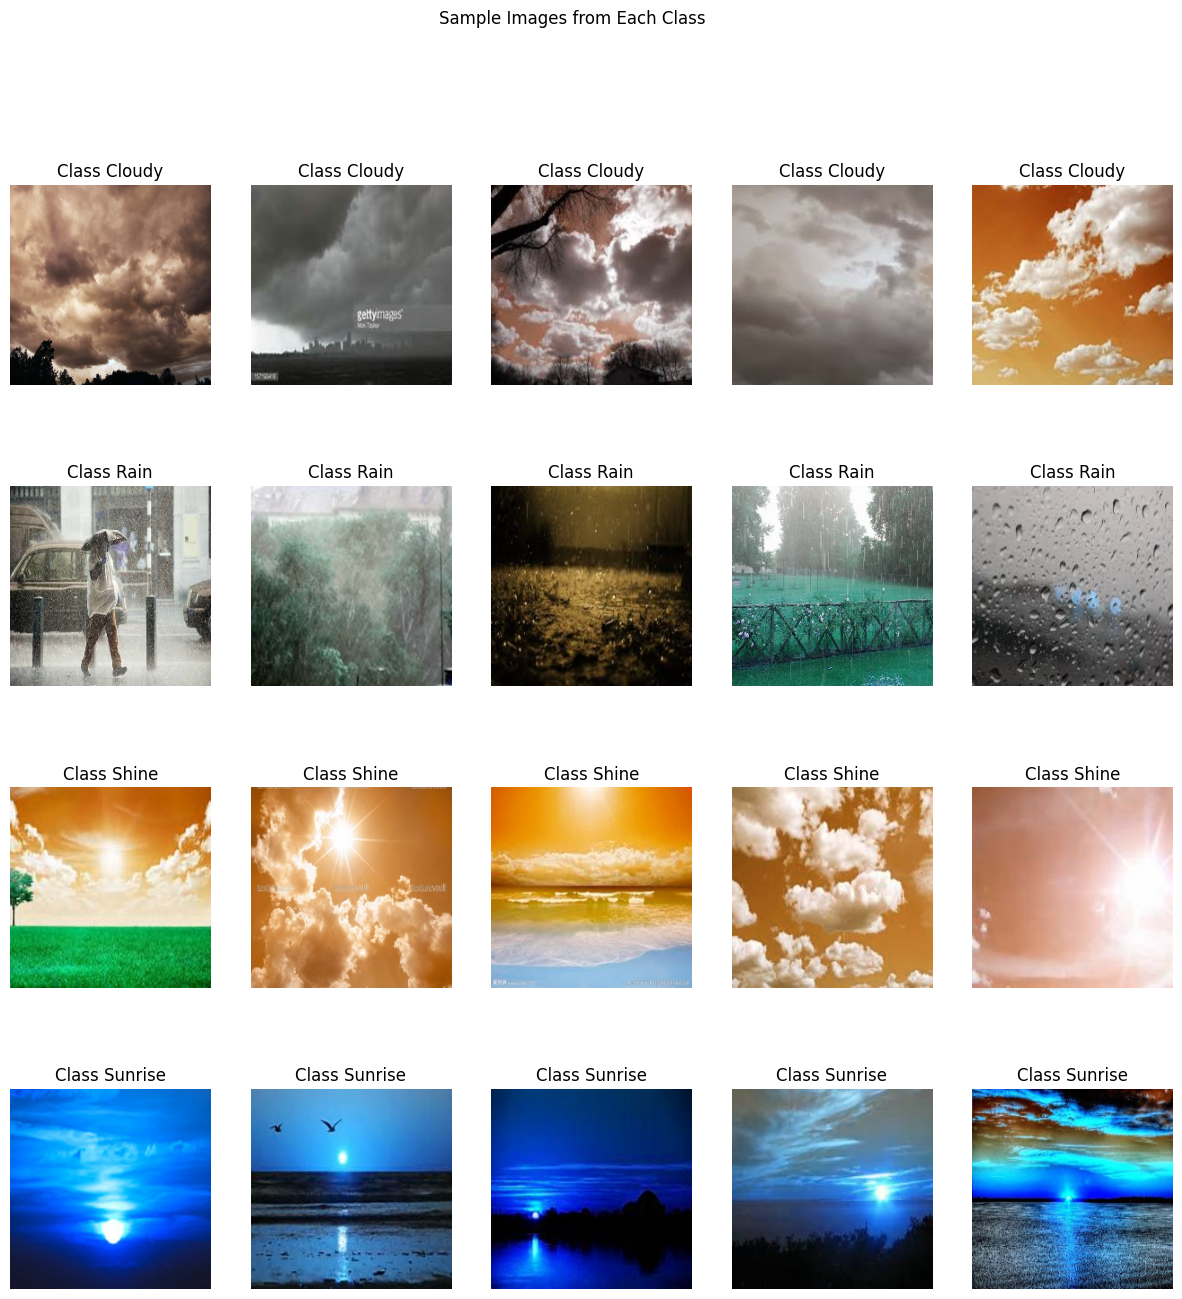

In [58]:
# Plot 5 images from each class
plt.figure(figsize = (15,15))
for i, subfolder in enumerate(subfolders):
    class_indices = np.where(labels == label_map[subfolder])[0]
    for j in range(5):
        plt.subplot(len(subfolders), 5, i*5 + j +1)
        plt.imshow(images[class_indices[j]])
        plt.title(f"Class {subfolder}")
        plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.show()

Veri Görselleştirme

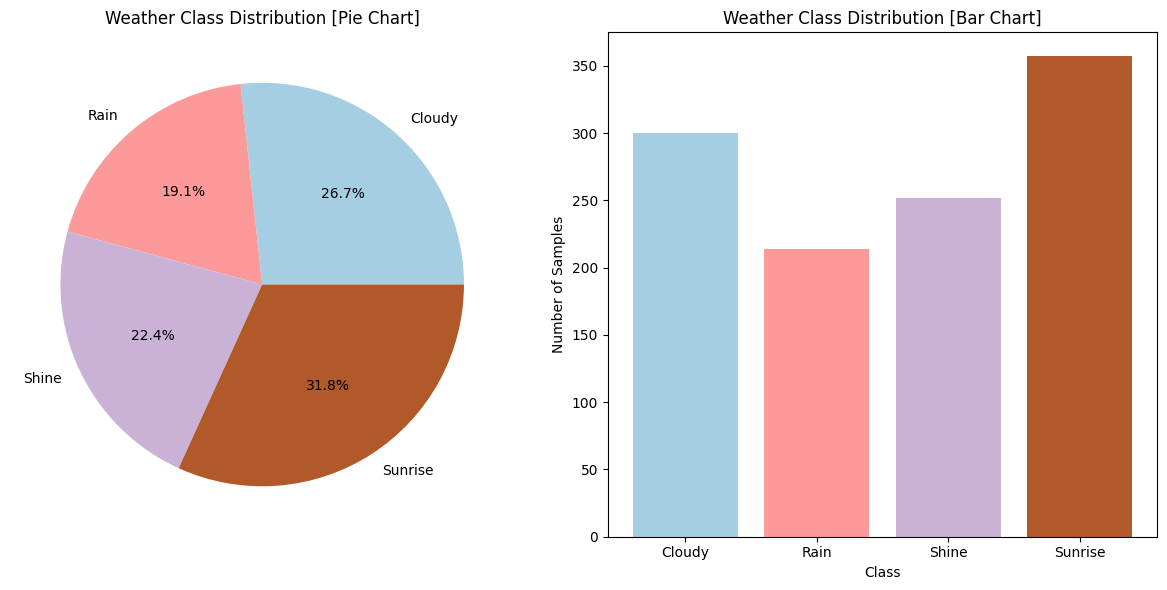

In [59]:
# Visual Representation for Class Distribution [ Pie Chart, Bar Chart]

class_counts = np.bincount(labels)
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
colors = plt.cm.Paired(np.linspace(0, 1, len(class_counts)))
plt.pie(class_counts, labels = subfolders, autopct = '%1.1f%%', colors = colors)
plt.title( 'Weather Class Distribution [Pie Chart]')

plt.subplot(1,2,2)
colors = plt.cm.Paired(np.linspace(0, 1, len(class_counts)))
plt.bar(subfolders, class_counts, color = colors)
plt.title('Weather Class Distribution [Bar Chart]')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

In [60]:
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes = len(subfolders))

Veri Setini Bölme

In [61]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size = 0.2, stratify = labels_one_hot, random_state = 42)

In [117]:
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

Model Mimarisi - Basit CNN

In [110]:
model = Sequential([
    Conv2D(32, (3,3), activation ='relu', input_shape = (224,224,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25), # overfitting engellemek için dropout kullanılır.

    Conv2D(64, (3,3), activation ='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation ='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation ='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.25),

    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │             5

 Total params: 259,268 (1012.77 KB)

 Trainable params: 258,564 (1010.02 KB)

 Non-trainable params: 704 (2.75 KB)

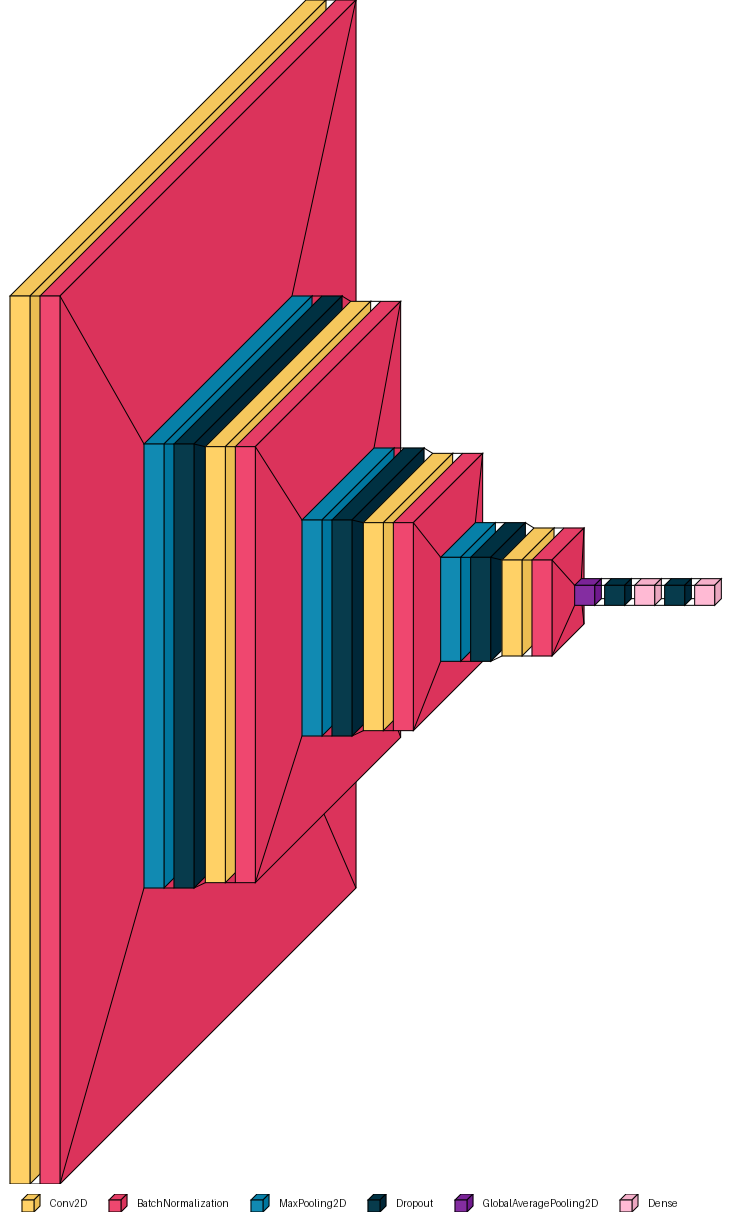

In [111]:
!pip install visualkeras

import visualkeras

visualkeras.layered_view(model, legend=True)

In [112]:
model.compile(optimizer = Adamax(learning_rate=0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

Model Eğitimi

In [115]:
#from tensorflow.keras import layers, models, optimizers, callbacks
#lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
#early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [125]:
history = model.fit(
    data_augmentation.flow(X_train, y_train, batch_size = 64),
    epochs = 25,
    validation_data = (X_test, y_test),
    #callbacks = [lr_scheduler, early_stopping]
)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 546ms/step - accuracy: 0.9503 - loss: 0.1638 - val_accuracy: 0.8267 - val_loss: 0.5572
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.9552 - loss: 0.1540 - val_accuracy: 0.8267 - val_loss: 0.5806
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.9422 - loss: 0.1910 - val_accuracy: 0.8222 - val_loss: 0.6179
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 515ms/step - accuracy: 0.9421 - loss: 0.1731 - val_accuracy: 0.8222 - val_loss: 0.6441
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.9435 - loss: 0.1527 - val_accuracy: 0.8222 - val_loss: 0.6470
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 341ms/step - accuracy: 0.9607 - loss: 0.1379 - val_accuracy: 0.8178 - val_loss: 0.6506
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.9443 - loss: 0.1453 - val_accuracy: 0.8222 - val_loss: 0.6520
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - accuracy: 0.9296 - loss: 0.1989 - val_accu

In [126]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7826 - loss: 0.7820
Test accuracy: 0.7644444704055786
Test loss: 0.867623507976532


In [127]:
# Classification Report

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=subfolders))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

      Cloudy       0.75      0.82      0.78        60
        Rain       0.98      0.93      0.95        43
       Shine       0.95      0.38      0.54        50
     Sunrise       0.65      0.89      0.75        72

    accuracy                           0.76       225
   macro avg       0.83      0.75      0.76       225
weighted avg       0.81      0.76      0.75       225



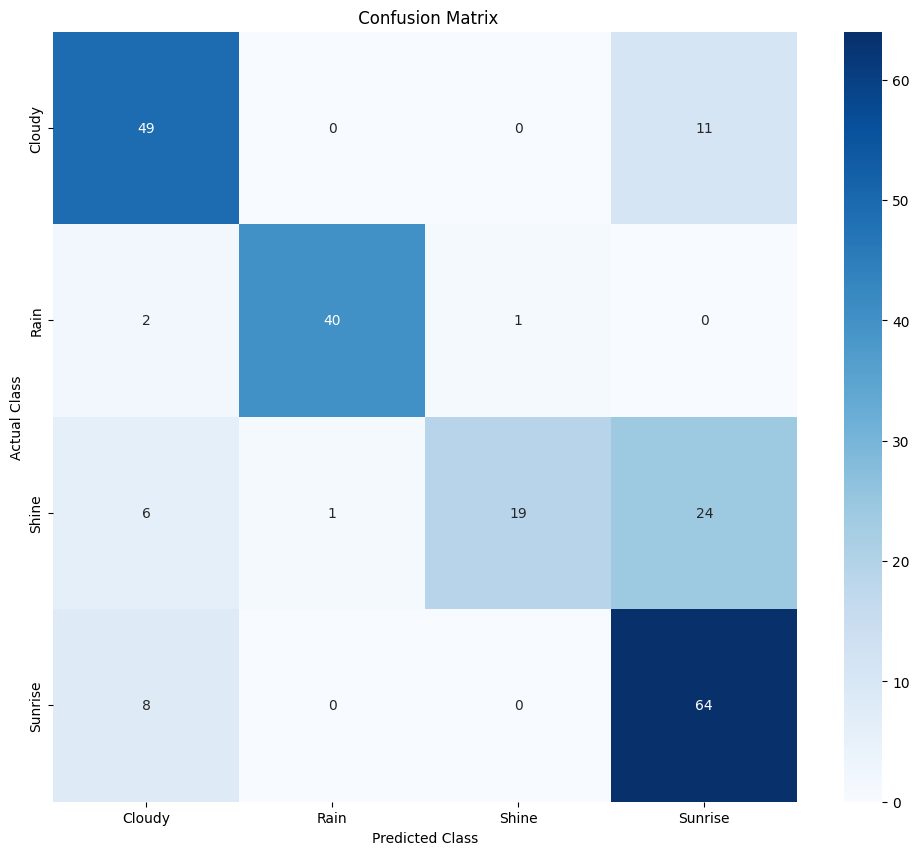

In [128]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(conf_mat , annot =True, fmt = 'd', cmap = 'Blues', xticklabels = subfolders, yticklabels = subfolders)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()